In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
infos_df = pd.read_csv('/content/drive/My Drive/DMC2020/infos.csv', sep='|')
items_df = pd.read_csv('/content/drive/My Drive/DMC2020/items.csv', sep='|')
orders_df = pd.read_csv('/content/drive/My Drive/DMC2020/orders.csv', sep='|')

In [0]:
orders_df['full-date'] = pd.to_datetime(orders_df['time'])
orders_df['date'] = orders_df['full-date'].dt.date
orders_df['time'] = orders_df['full-date'].dt.time
orders_df['week'] = orders_df['full-date'].dt.week
orders_df['dayofweek'] = orders_df['full-date'].dt.dayofweek
orders_df['month'] = orders_df['full-date'].dt.month
orders_df['date'] = orders_df['full-date'].dt.date

orders_df['date'] = pd.to_datetime(orders_df['date'])

orders_df.drop(columns=['time'], inplace = True)
orders_df['sales'] = orders_df['order']*orders_df['salesPrice']

sales_df = orders_df.merge(items_df, left_on='itemID', right_on='itemID').merge(infos_df, left_on='itemID', right_on='itemID')
sales_df.sort_values('full-date', inplace = True)

In [0]:
sales_date = sales_df[['date','sales']].groupby('date').sum()
sales_week = sales_df[['week','sales']].groupby('week').sum()
order_date = sales_df[['date','order']].groupby('date').sum()
order_week = sales_df[['week','order']].groupby('week').sum()

sales_date.reset_index(inplace=True)
order_date.reset_index(inplace=True)
sales_week.reset_index(inplace=True)
order_week.reset_index(inplace=True)

In [0]:
fig = px.line(sales_date, x='date', y='sales')
fig.show()

In [0]:
fig = px.line(order_date, x='date', y='order')
fig.show()

In [0]:
fig = px.line(sales_week, x='week', y='sales')
fig.show()

In [0]:
fig = px.line(order_week, x='week', y='order')
fig.show()

Text(0.5, 0, 'date')

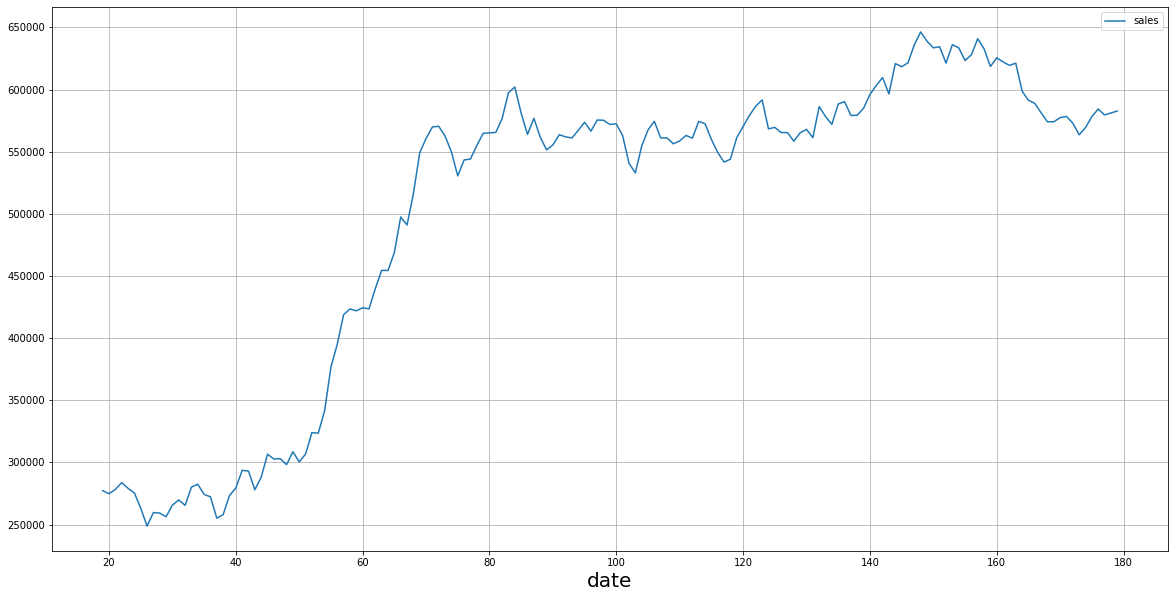

In [0]:
sales_date.rolling(20).mean().plot(figsize=(20,10), grid=True)
plt.xlabel('date', fontsize=20)

Text(0.5, 0, 'date')

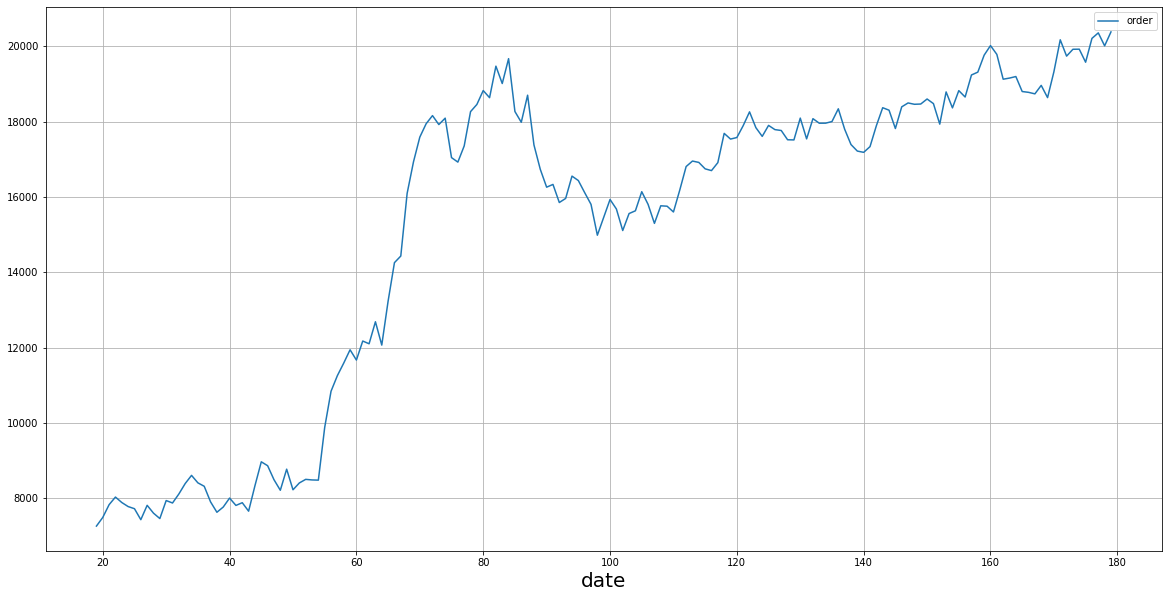

In [0]:
order_date.rolling(20).mean().plot(figsize=(20,10), grid=True)
plt.xlabel('date', fontsize=20)

Text(0.5, 0, 'week')

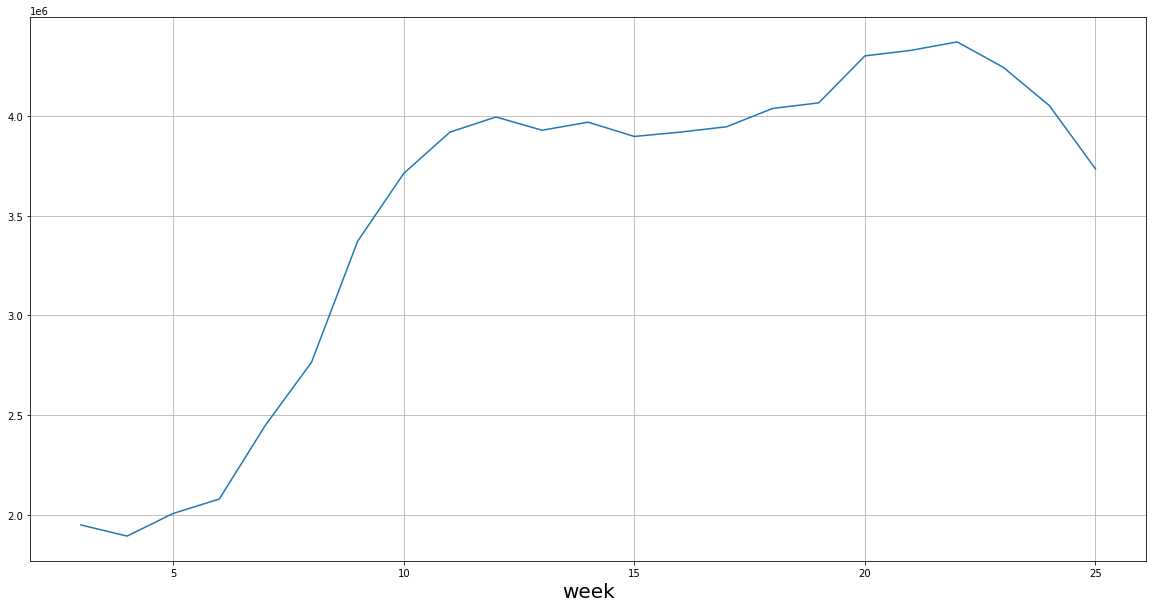

In [0]:
sales_week['sales'].rolling(4).mean().plot(figsize=(20,10), grid=True)
plt.xlabel('week', fontsize=20)

Text(0.5, 0, 'week')

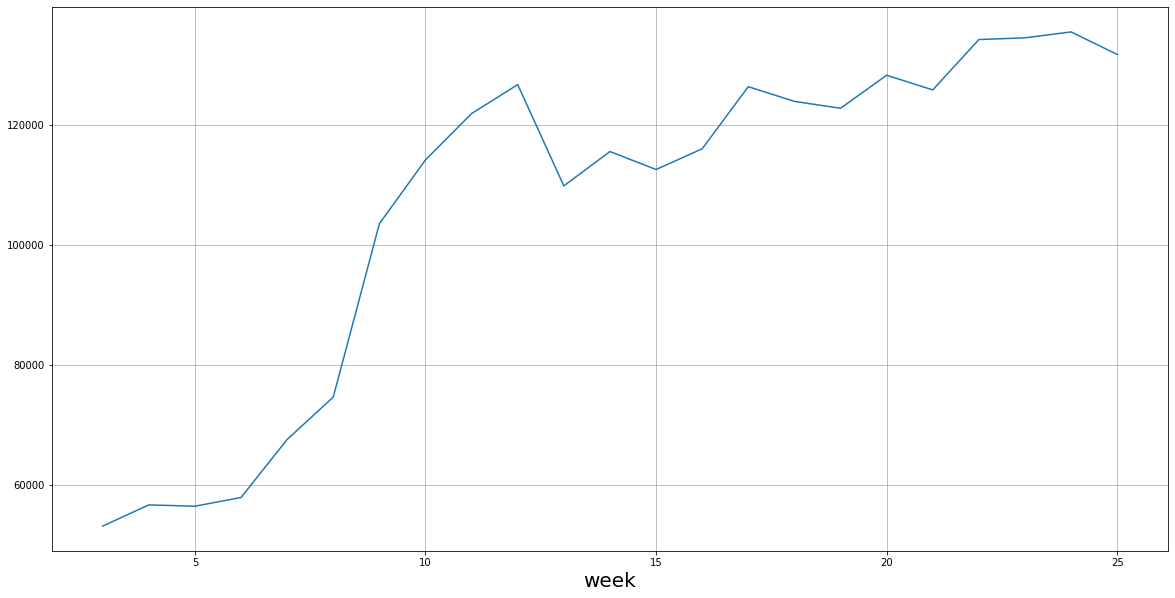

In [0]:
order_week['order'].rolling(4).mean().plot(figsize=(20,10), grid=True)
plt.xlabel('week', fontsize=20)

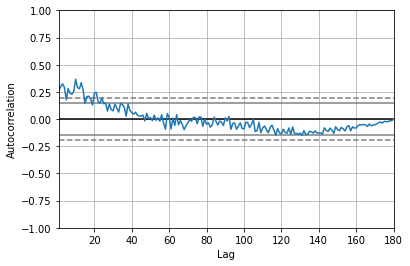

In [0]:
 pd.plotting.autocorrelation_plot(df.drop(columns=('sales')))

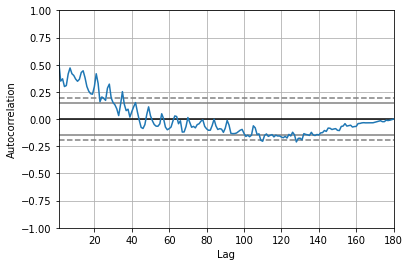

In [0]:
pd.plotting.autocorrelation_plot(df.drop(columns=('order')))